<a href="https://colab.research.google.com/github/paulopetrillo/FIAP_TECH_CHALENGE_01/blob/main/TECH_CHALENGE_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# !pip install yfinance

In [101]:
# !pip install pandas

In [102]:
# Carrega/importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import matplotlib

import warnings
warnings.filterwarnings('ignore')


# carrega bilbioteca yfinance (sugerida pelo Prof. Daniel Lima) para carregar
# automaticamente os dados da BVSP (https://br.investing.com/indices/bovespa-historical-data)
import yfinance as yf

print('Versão do pandas => %s' % pd.__version__)
print('Versão do numpy => %s' % np.__version__)
print('Versão do matplotlib => %s' % matplotlib.__version__)
print('Versão do seaborn => %s' % sns.__version__ )
print('Versão do yfinance => %s' % yf.__version__ )



# "^BVSP" parametro para pegar a cotação da BVSP (Ibovespa (IBOV))
dados = yf.Ticker("^BVSP")

Versão do pandas => 2.2.2
Versão do numpy => 2.0.2
Versão do matplotlib => 3.10.0
Versão do seaborn => 0.13.2
Versão do yfinance => 0.2.65


In [103]:
# paranmetros completos para dowload dos dados da BVSP.
# Conforme: https://ranaroussi.github.io/yfinance/
dados = yf.Ticker("^BVSP")
dados.info
dados.calendar
dados.analyst_price_targets
dados.quarterly_income_stmt
# dados.history(start='2022-01-01', end='2025-07-19')
# dat.history(period='3y')
# dat.option_chain(dat.options[4]).calls

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 


""


In [5]:
# documentação em: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# https://github.com/ranaroussi/yfinance
# ----------------------------------------------------------------------------------
# periodstr
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Default: 1mo Either Use period parameter or use start and end

# intervalstr
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days

# start: str
# Download start date string (YYYY-MM-DD) or _datetime, inclusive. Default is 99 years ago E.g. for start=”2020-01-01”, the first data point will be on “2020-01-01”

# end: str
# Download end date string (YYYY-MM-DD) or _datetime, exclusive. Default is now E.g. for end=”2023-01-01”, the last data point will be on “2022-12-31”

In [104]:
# Atribuinda os dados a variável dados.
#dados = dat.history(period="max")
#dados = dados.history(start='2022-01-01', end='2025-07-19')
dados = dados.history(period='5y')


# transforma dados em um Dataframe.
dados = pd.DataFrame(dados)

# verificando os tipos de cada coluna.
dados.info()

# Observação:
# A coluna "close" dos dados baixados refere-se a coluna "Último"
# dos dados do site "https://br.investing.com/indices/bovespa-historical-data".

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-08-18 00:00:00-03:00 to 2025-08-18 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1244 non-null   float64
 1   High          1244 non-null   float64
 2   Low           1244 non-null   float64
 3   Close         1244 non-null   float64
 4   Volume        1244 non-null   int64  
 5   Dividends     1244 non-null   float64
 6   Stock Splits  1244 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.8 KB


In [105]:
# Verifica alguns valores do dataframe.
dados.tail(15)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-29 00:00:00-03:00,132130.0,133346.0,132130.0,132726.0,6324800,0.0,0.0
2025-07-30 00:00:00-03:00,132702.0,134368.0,131883.0,133990.0,8655300,0.0,0.0
2025-07-31 00:00:00-03:00,133987.0,133987.0,132096.0,133071.0,9196800,0.0,0.0
2025-08-01 00:00:00-03:00,132920.0,133237.0,132140.0,132437.0,8497100,0.0,0.0
2025-08-04 00:00:00-03:00,132440.0,133929.0,132440.0,132971.0,6136600,0.0,0.0
2025-08-05 00:00:00-03:00,132971.0,134233.0,132682.0,133151.0,6606300,0.0,0.0
2025-08-06 00:00:00-03:00,133169.0,135241.0,133169.0,134538.0,8681700,0.0,0.0
2025-08-07 00:00:00-03:00,134538.0,137007.0,134534.0,136528.0,9501000,0.0,0.0
2025-08-08 00:00:00-03:00,136526.0,136761.0,135659.0,135913.0,9890600,0.0,0.0


In [106]:
# # selecionar os dados de janeiro de 2023 do dataframe dados
# dados.loc[dados.index > '2023-01-02']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-03:00,106377.0,106684.0,103852.0,104166.0,14466700,0.0,0.0
2023-01-04 00:00:00-03:00,104167.0,105627.0,103915.0,105334.0,14451200,0.0,0.0
2023-01-05 00:00:00-03:00,105336.0,107743.0,105333.0,107518.0,15512000,0.0,0.0
2023-01-06 00:00:00-03:00,107642.0,109433.0,107642.0,108836.0,12626600,0.0,0.0
2023-01-09 00:00:00-03:00,108964.0,109938.0,108134.0,109227.0,12047300,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-12 00:00:00-03:00,135629.0,138414.0,135629.0,137914.0,8342100,0.0,0.0
2025-08-13 00:00:00-03:00,137911.0,137913.0,136535.0,136687.0,9398500,0.0,0.0
2025-08-14 00:00:00-03:00,136681.0,137437.0,135588.0,136356.0,9667800,0.0,0.0


In [107]:
# # Descrição inicial dos campos
# dados.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03,1244.0,1244.0
mean,118041.066720,118973.304662,117142.016881,118069.368971,1.077623e+07,0.0,0.0
std,10849.436164,10736.339381,10947.464374,10851.388438,3.221587e+06,0.0,0.0
min,93586.000000,95340.000000,93387.000000,93580.000000,0.000000e+00,0.0,0.0
25%,109937.000000,110919.250000,108617.250000,109925.750000,8.778875e+06,0.0,0.0
50%,118141.500000,119119.000000,117421.000000,118156.000000,1.050710e+07,0.0,0.0
75%,127223.000000,127862.750000,126405.750000,127256.000000,1.257128e+07,0.0,0.0
max,141265.000000,141537.000000,140597.000000,141478.000000,2.602930e+07,0.0,0.0


In [10]:
# # Transpõe a tabela de resumo de dados estatísticos (describe).
# dados.describe().T

In [108]:
# Observação 1:
# Campos "Dividends" e "Stock Splits" não tem dados, portanto podem ser retirados.

# Retirando as colunas  "Dividends" e "Stock Splits"
dados = dados.drop(labels=['Dividends', 'Stock Splits'], axis=1)
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-18 00:00:00-03:00,99597.0,102247.0,99597.0,102065.0,9418700
2020-08-19 00:00:00-03:00,102072.0,102334.0,100800.0,100854.0,10025800
2020-08-20 00:00:00-03:00,100853.0,101749.0,99131.0,101468.0,9405000
2020-08-21 00:00:00-03:00,101460.0,101566.0,100412.0,101521.0,9100200
2020-08-24 00:00:00-03:00,101525.0,102515.0,101525.0,102298.0,7723000


In [109]:
# Obsevação 2:
# A coluna "Date" está como índice da tabela.

# Mostra os dados
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-18 00:00:00-03:00,99597.0,102247.0,99597.0,102065.0,9418700
2020-08-19 00:00:00-03:00,102072.0,102334.0,100800.0,100854.0,10025800
2020-08-20 00:00:00-03:00,100853.0,101749.0,99131.0,101468.0,9405000
2020-08-21 00:00:00-03:00,101460.0,101566.0,100412.0,101521.0,9100200
2020-08-24 00:00:00-03:00,101525.0,102515.0,101525.0,102298.0,7723000


In [110]:
from sqlite3 import Timestamp
from os import times_result
# Vamos criar uma coluna com os dados do indice do tipo data.

# Importa biblioteca para tratar datas
from datetime import datetime

# Cria coluna com as datas.
dados['Data'] = dados.index

# Formata para dia.mês.ano (o método "".dt.date" deixa o campo com tipo object).
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y').dt.date

# Define o indice do Data-Frame com a Data (facilita na busca por datas).
dados.index = pd.to_datetime(dados.Data, format='%d-%m-%Y')
# dados.index = pd.to_datetime(dados.index, format='%d-%m-%Y') ##<<< bastaria nesta celula

# Transforma o tipo da coluna "Data" de 'Object' para 'datetime64'.
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y')

# Informações dos dados (quantidade e tipo de dados).
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-08-18 to 2025-08-18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    1244 non-null   float64       
 1   High    1244 non-null   float64       
 2   Low     1244 non-null   float64       
 3   Close   1244 non-null   float64       
 4   Volume  1244 non-null   int64         
 5   Data    1244 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.0 KB


,Open,High,Low,Close,Volume,Data
Data,,,,,,
2020-08-18,99597.0,102247.0,99597.0,102065.0,9418700,2020-08-18
2020-08-19,102072.0,102334.0,100800.0,100854.0,10025800,2020-08-19
2020-08-20,100853.0,101749.0,99131.0,101468.0,9405000,2020-08-20
2020-08-21,101460.0,101566.0,100412.0,101521.0,9100200,2020-08-21
2020-08-24,101525.0,102515.0,101525.0,102298.0,7723000,2020-08-24


In [111]:
# Testa busca de linhas do dataframe usando a data como indíce.
dados.loc['01-05-2024']

,2024-01-05
Open,131218.0
High,132635.0
Low,130579.0
Close,132023.0
Volume,9199700
Data,2024-01-05 00:00:00


In [112]:
# Alterando a ordem das colunas, apenas para ficar na mesma sequência que o site.
dados = dados[['Close', 'Open', 'High', 'Low', 'Volume', 'Data']]
dados.head()

,Close,Open,High,Low,Volume,Data
Data,,,,,,
2020-08-18,102065.0,99597.0,102247.0,99597.0,9418700,2020-08-18
2020-08-19,100854.0,102072.0,102334.0,100800.0,10025800,2020-08-19
2020-08-20,101468.0,100853.0,101749.0,99131.0,9405000,2020-08-20
2020-08-21,101521.0,101460.0,101566.0,100412.0,9100200,2020-08-21
2020-08-24,102298.0,101525.0,102515.0,101525.0,7723000,2020-08-24


In [16]:
# # Executar está célula caso queira apagar (dropar) a coluna "Data".
# dados.drop(labels=['Data'], axis=1, inplace=True)
# dados.head()

In [113]:
# Renomei as colunas conforme dados da BVSP.
dados.rename(columns={'Close':'Ultimo',
                      'Open':'Abertura',
                      'High':'Maxima',
                      'Low':'Minima'},inplace=True)
dados.info()
dados.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-08-18 to 2025-08-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ultimo    1244 non-null   float64       
 1   Abertura  1244 non-null   float64       
 2   Maxima    1244 non-null   float64       
 3   Minima    1244 non-null   float64       
 4   Volume    1244 non-null   int64         
 5   Data      1244 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 100.3 KB


,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2025-08-12,137914.0,135629.0,138414.0,135629.0,8342100,2025-08-12
2025-08-13,136687.0,137911.0,137913.0,136535.0,9398500,2025-08-13
2025-08-14,136356.0,136681.0,137437.0,135588.0,9667800,2025-08-14
2025-08-15,136341.0,136354.0,136431.0,135583.0,9291000,2025-08-15
2025-08-18,137322.0,136341.0,137902.0,136341.0,8089900,2025-08-18


In [114]:
type(dados.index)

pandas.core.indexes.datetimes.DatetimeIndex

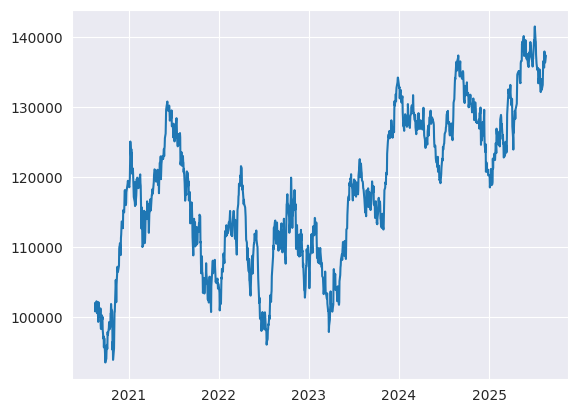

In [115]:
# Plotando os resultados do Valor de fechamento da bolsa (campo chamado "Último").
plt.plot(dados.index, dados['Ultimo'])
#plt.plot(dados.Data, dados['Último'])

In [116]:
resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=252)

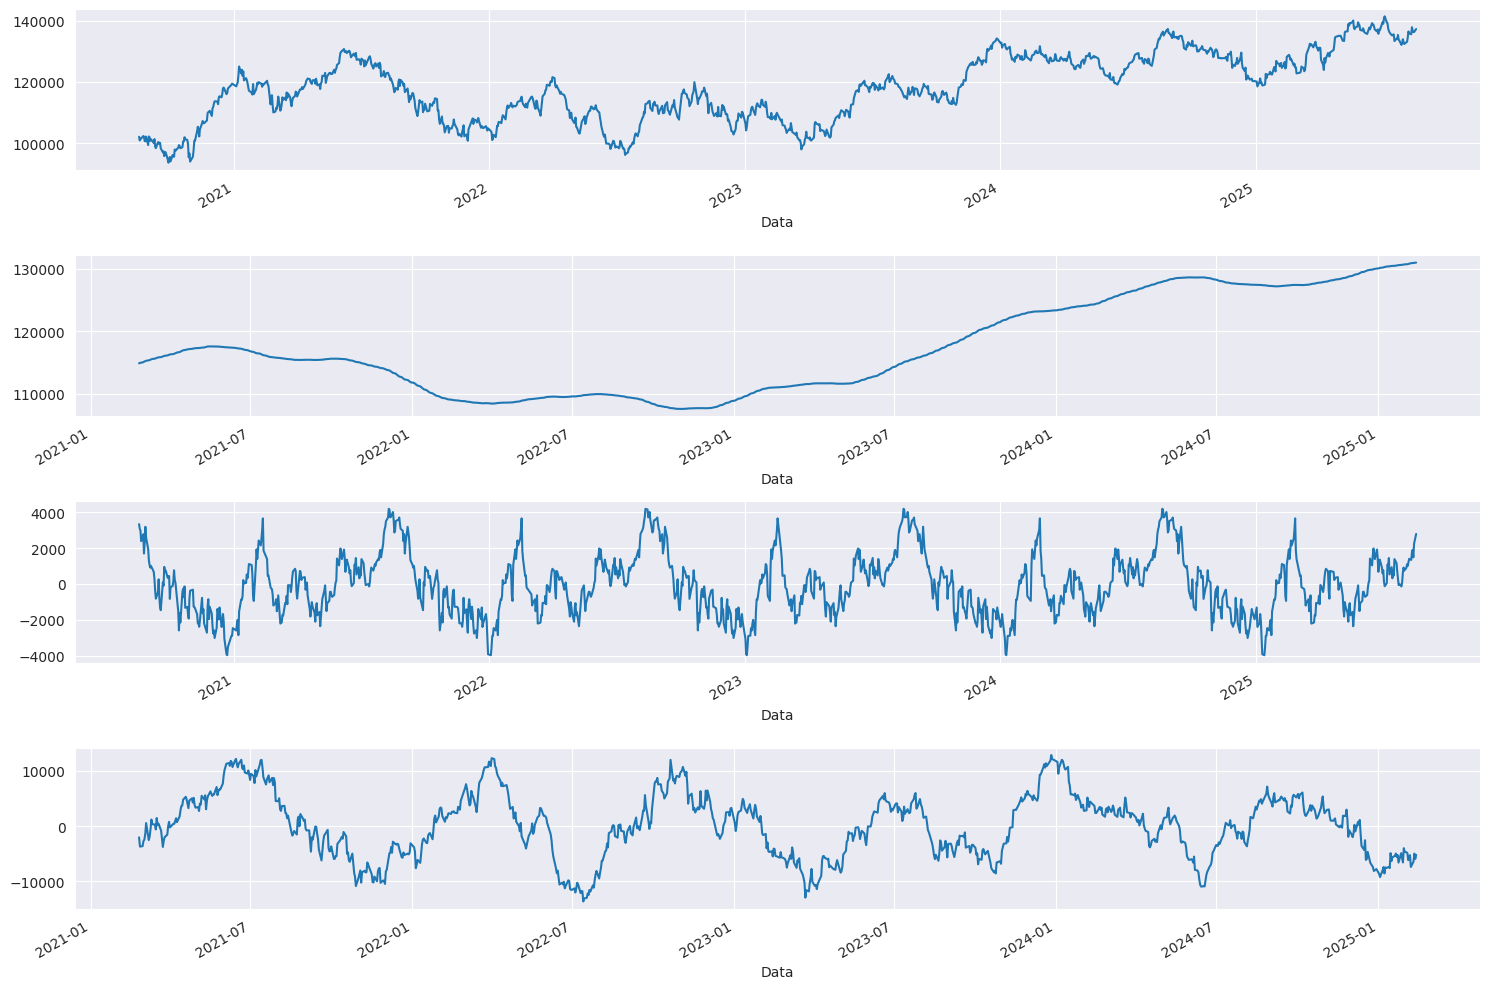

In [121]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [22]:
# tendência - direção (seta para cima, seta para baixo)
# sazonalidade - recorrência das oscilações
# resíduos - o que sobra do sinal - erros - desvio da média

In [23]:
# Veridficação quanto a série ser "estacionário" ou "não estacionário".

# ADF (Augmented Dickey-Fuller)
# H0 - Hipótese nula <=> Série NÃO é estacionário.
# H1 - Hipótese altrenativa <=> Sério é estacionário.

# p-value =< 0.05 (5%), então rejeitamos H0 com nível de confiança de 95%.
# SE (p-value menor ou igual À 5%) ENTÃO (rejeita H0)

# Mais genericamente:
# SE (teste aplicado =< p-value), ENTÃO (rejeitamos H0), ou ainda
# SE (teste aplicado menor ou igual à p-value), ENTÃO (rejeitamos H0).

In [122]:
from statsmodels.tsa.stattools import adfuller

In [123]:
sns.set_style('darkgrid')

In [124]:
x = dados['Ultimo'].values

In [126]:
result =  adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

for key, value in result[4].items():
  print(f'{key}: {value}')

ADF Statistic: -2.0426983232342293
p-value: 0.26817068863772975
Critical Values: {'1%': np.float64(-3.435621806786881), '5%': np.float64(-2.8638680226791444), '10%': np.float64(-2.5680094689100477)}
1%: -3.435621806786881
5%: -2.8638680226791444
10%: -2.5680094689100477


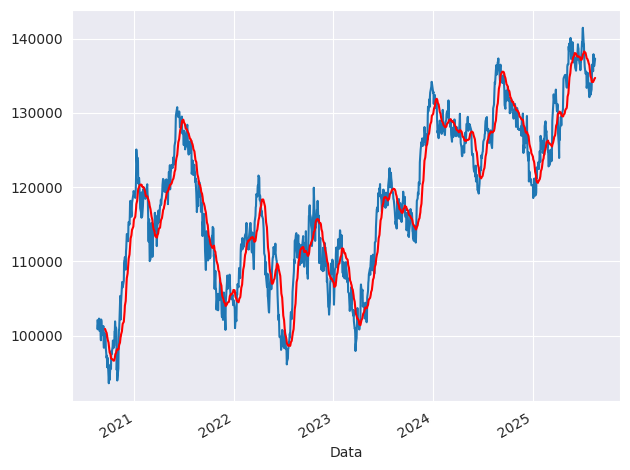

In [129]:
ma = dados.Ultimo.rolling(20).mean()

f, ax = plt.subplots()
#dados.select_dtypes(include=np.number).plot(ax=ax, legend=False)
dados.Ultimo.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r') # ma <=> moving average (curva masi suaves - menor influencia de variação)
plt.tight_layout()

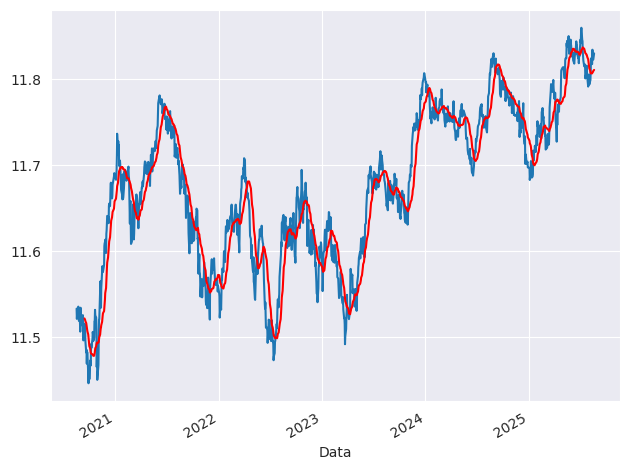

In [136]:
dados_Ultimo_log = np.log(dados.Ultimo)
ma_log = dados_Ultimo_log.rolling(20).mean()

f, ax = plt.subplots()
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

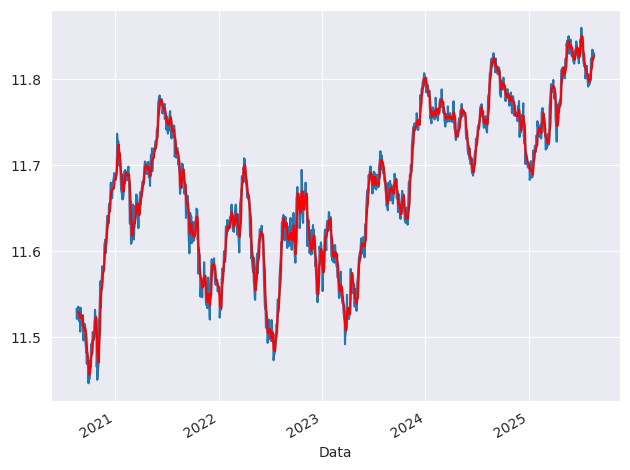

In [132]:
dados_Ultimo_log = np.log(dados.Ultimo)
ma_5_log = dados_Ultimo_log.rolling(5).mean()

f, ax = plt.subplots()
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_5_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

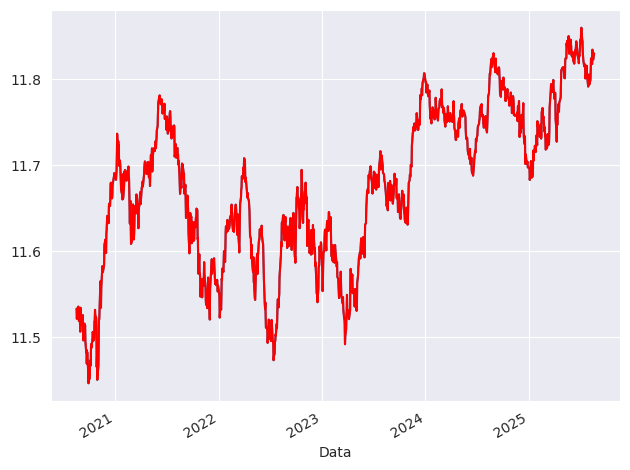

In [133]:
dados_Ultimo_log = np.log(dados.Ultimo)
ma_1_log = dados_Ultimo_log.rolling(1).mean()

f, ax = plt.subplots()
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_1_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

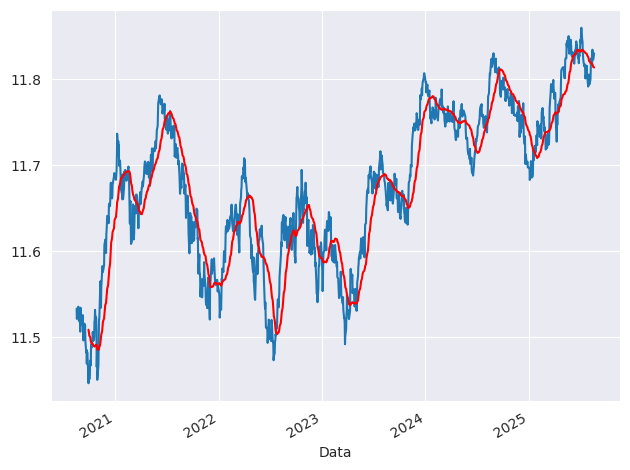

In [135]:
dados_Ultimo_log = np.log(dados.Ultimo)
ma_30_log = dados_Ultimo_log.rolling(30).mean()

f, ax = plt.subplots()
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_30_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

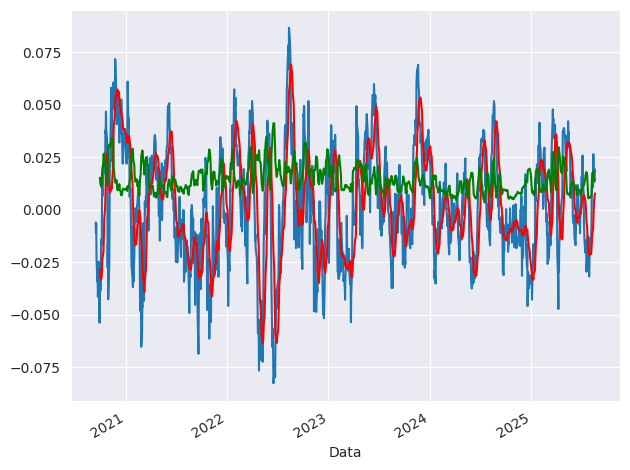

In [138]:
dados_Ultimo_s = (dados_Ultimo_log - ma_log).dropna()

# media (ma_s)
ma_s = dados_Ultimo_s.rolling(12).mean()

# desvio padrão (std)
std = dados_Ultimo_s.rolling(12).std()

f, ax = plt.subplots()
dados_Ultimo_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r') # media => linha vermelha
std.plot(ax=ax, legend=False, color='g')  # desvio padrão => linha verde
plt.tight_layout()


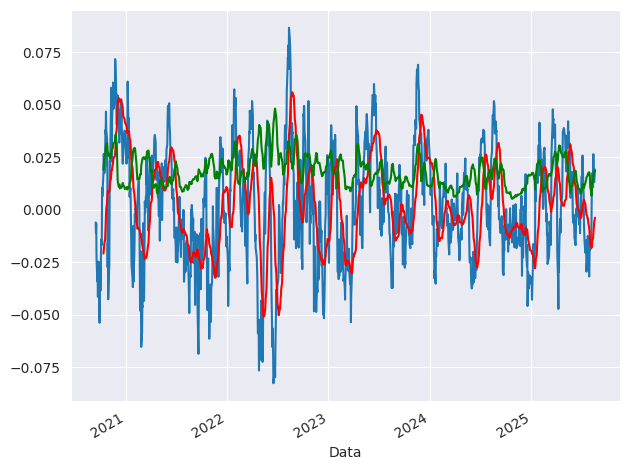

In [139]:
dados_Ultimo_s = (dados_Ultimo_log - ma_log).dropna()

# media (ma_20_s)
ma_20_s = dados_Ultimo_s.rolling(20).mean()

# desvio padrão (std_20)
std_20 = dados_Ultimo_s.rolling(20).std()

f, ax = plt.subplots()
dados_Ultimo_s.plot(ax=ax, legend=False)
ma_20_s.plot(ax=ax, legend=False, color='r') # media => linha vermelha
std_20.plot(ax=ax, legend=False, color='g')  # desvio padrão => linha verde
plt.tight_layout()

In [140]:
X_s = dados_Ultimo_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -7.22394788706463
P-Value: 2.0764511517348496e-10
Valores críticos:
	1%: -3.4357038129673962
	5%: -2.8639042041471887
	10%: -2.5680287376916997


Teste ADF
Teste Estatístico: -36.49682491144039
P-Value: 0.0
Valores críticos:
	1%: -3.4356260602190356
	5%: -2.863869899335344
	10%: -2.5680104683371323


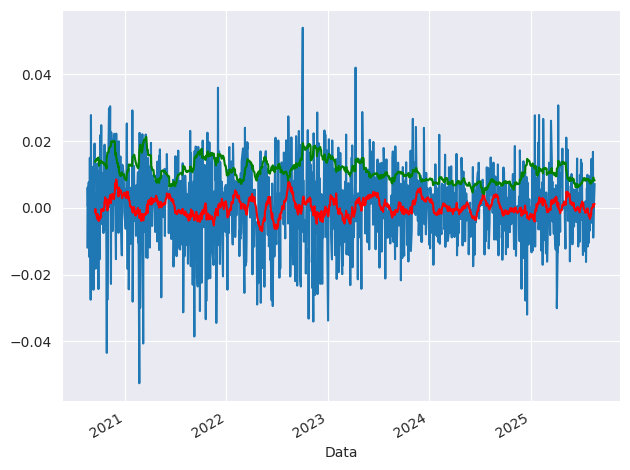

In [142]:
dados_Ultimo_diff = dados_Ultimo_log.diff(1)
ma_diff = dados_Ultimo_diff.rolling(20).mean()

std_diff = dados_Ultimo_diff.rolling(20).std()


f, ax = plt.subplots()
dados_Ultimo_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = dados_Ultimo_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -13.994900105011306
P-Value: 3.955762083740024e-26
Valores críticos:
	1%: -3.435712593855191
	5%: -2.863908078253003
	10%: -2.5680308008925294


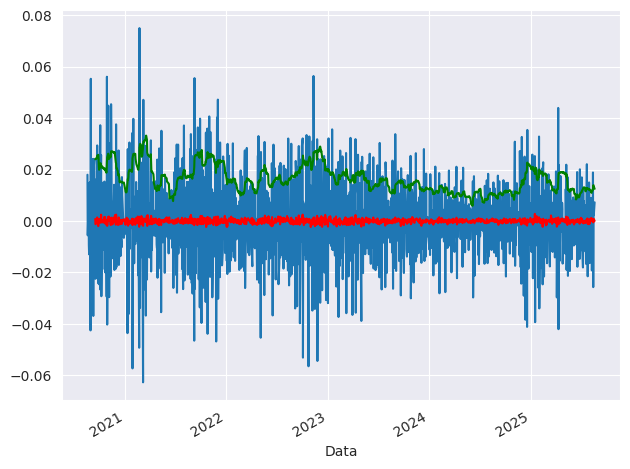

In [143]:
dados_Ultimo_diff_2 = dados_Ultimo_diff.diff(1)
ma_diff_2 = dados_Ultimo_diff_2.rolling(20).mean()

std_diff_2 = dados_Ultimo_diff_2.rolling(20).std()


f, ax = plt.subplots()
dados_Ultimo_diff_2.plot(ax=ax, legend=False)
ma_diff_2.plot(ax=ax, legend=False, color='r')
std_diff_2.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff_2 = dados_Ultimo_diff_2.dropna().values
result_diff_2 = adfuller(X_diff_2)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff_2[0]}")
print(f"P-Value: {result_diff_2[1]}")
print("Valores críticos:")

for key, value in result_diff_2[4].items():
  print(f"\t{key}: {value}")

# dados_Ultimo_diff = dados_Ultimo_s.diff(1)
# ma_diff = dados_Ultimo_diff.rolling(12).mean()

# std_diff = dados_Ultimo_diff.rolling(12).std()


# f, ax = plt.subplots()
# dados_Ultimo_diff.plot(ax=ax, legend=False)
# ma_diff.plot(ax=ax, legend=False, color='r')
# std_diff.plot(ax=ax, legend=False, color='g')
# plt.tight_layout()

# X_diff = dados_Ultimo_diff.dropna().values
# result_diff = adfuller(X_diff)

# print("Teste ADF")
# print(f"Teste Estatístico: {result_diff[0]}")
# print(f"P-Value: {result_diff[1]}")
# print("Valores críticos:")

# for key, value in result_diff[4].items():
#   print(f"\t{key}: {value}")

In [144]:
# ARIMA = AR-I-MA
# AR:Autoregressivo,
# I:Integrado,
# MA:Moving Avaerage

# ACF - AutoCorrelation Function
# PACF - Partial AutoCorrelation Function

lag_acf = acf(dados_Ultimo_s, nlags=20)
lag_pacf = pacf(dados_Ultimo_s, nlags=20, method='ywadjusted')

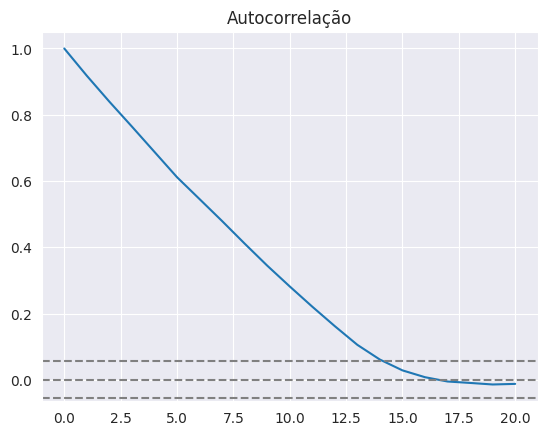

In [145]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray')

plt.title('Autocorrelação')
plt.show()

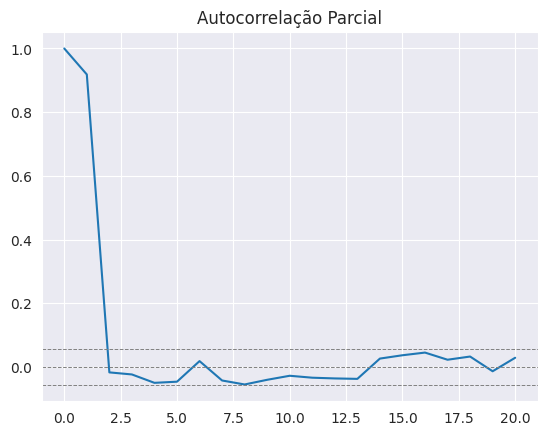

In [146]:
plt.plot(lag_pacf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray',linewidth=0.7)

plt.title('Autocorrelação Parcial')
plt.show()

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

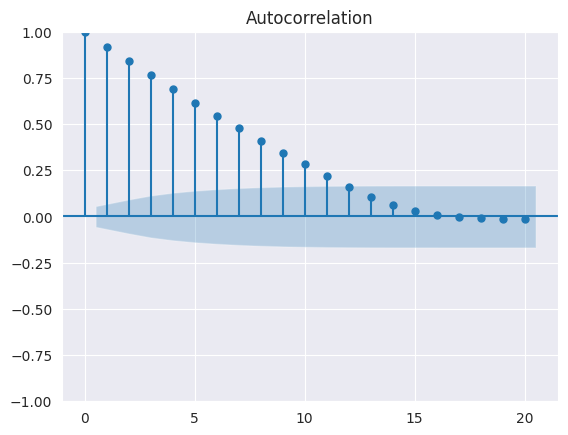

In [148]:
plot_acf(dados_Ultimo_s, lags=20)
plt.show()

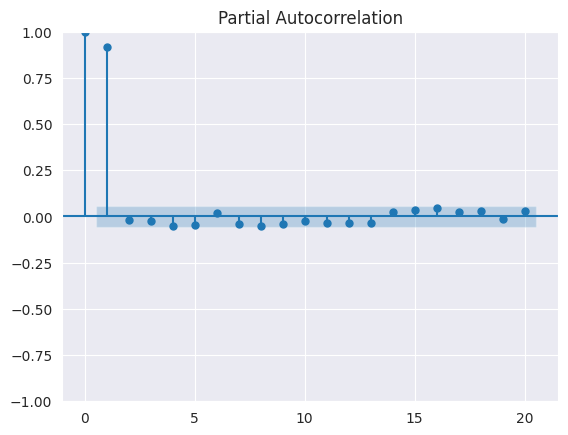

In [149]:
plot_pacf(dados_Ultimo_s, lags=20)
plt.show()

In [150]:
# instala a biblioteca statsforcast
!pip install statsforecast

In [151]:
# copiando base de dados para utilização do statsforcast
df_statsforecast = dados.copy()
df_statsforecast.head()

,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2020-08-18,102065.0,99597.0,102247.0,99597.0,9418700,2020-08-18
2020-08-19,100854.0,102072.0,102334.0,100800.0,10025800,2020-08-19
2020-08-20,101468.0,100853.0,101749.0,99131.0,9405000,2020-08-20
2020-08-21,101521.0,101460.0,101566.0,100412.0,9100200,2020-08-21
2020-08-24,102298.0,101525.0,102515.0,101525.0,7723000,2020-08-24


In [152]:
# Cria coluna de média móvel para 5 dias
df_statsforecast["MedMov5Dias"] = df_statsforecast["Ultimo"].rolling(window=5).mean()
# df_statsforecast["MedMov10Dias"] = df_statsforecast["Ultimo"].rolling(window=10).mean()
# df_statsforecast["MedMov30Dias"] = df_statsforecast["Ultimo"].rolling(window=30).mean

# Cria coluna categorica com as classes "Up" e "Down" que identifica a direção do movimento diário.
df_statsforecast['Daily_Direction'] = np.where(df_statsforecast['Ultimo'] > df_statsforecast['Abertura'], 1, 0)

# Formatando base de dados para o padrão de series temporais
df_statsforecast.drop(labels=['Maxima', 'Minima', 'Volume','Data'], axis=1, inplace=True)
df_statsforecast.reset_index(inplace=True)
df_statsforecast.rename(columns={'Data':'ds'
                               , 'Daily_Direction':'unique_id'
                               , 'Ultimo':'y'}, inplace=True)
#df_statsforecast.set_index('ds', inplace=True)

# ver dados
df_statsforecast.head(10)

,ds,y,Abertura,MedMov5Dias,unique_id
0,2020-08-18,102065.0,99597.0,NaN,1
1,2020-08-19,100854.0,102072.0,NaN,0
2,2020-08-20,101468.0,100853.0,NaN,1
3,2020-08-21,101521.0,101460.0,NaN,1
4,2020-08-24,102298.0,101525.0,101641.2,1
5,2020-08-25,102118.0,102293.0,101651.8,0
6,2020-08-26,100627.0,102119.0,101606.4,0
7,2020-08-27,100624.0,100625.0,101437.6,0
8,2020-08-28,102143.0,100631.0,101562.0,1
9,2020-08-31,99369.0,102142.0,100976.2,0


In [155]:
# Separando os dados em grupo de treinamento e grupo de teste (validação).
treino = df_statsforecast.loc[df_statsforecast['ds'] < '2025-05-01']
teste = df_statsforecast.loc[(df_statsforecast['ds'] >= '2025-05-01') & (df_statsforecast['ds'] < '2025-07-19')]
h = teste['ds'].nunique()
print(f"h = {h}")
print(f"Treino: {treino.shape}")
print(f"Teste: {teste.shape}")

h = 55
Treino: (1168, 5)
Teste: (55, 5)


In [156]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [157]:
!pip install statsforecast

In [158]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: 1.84%


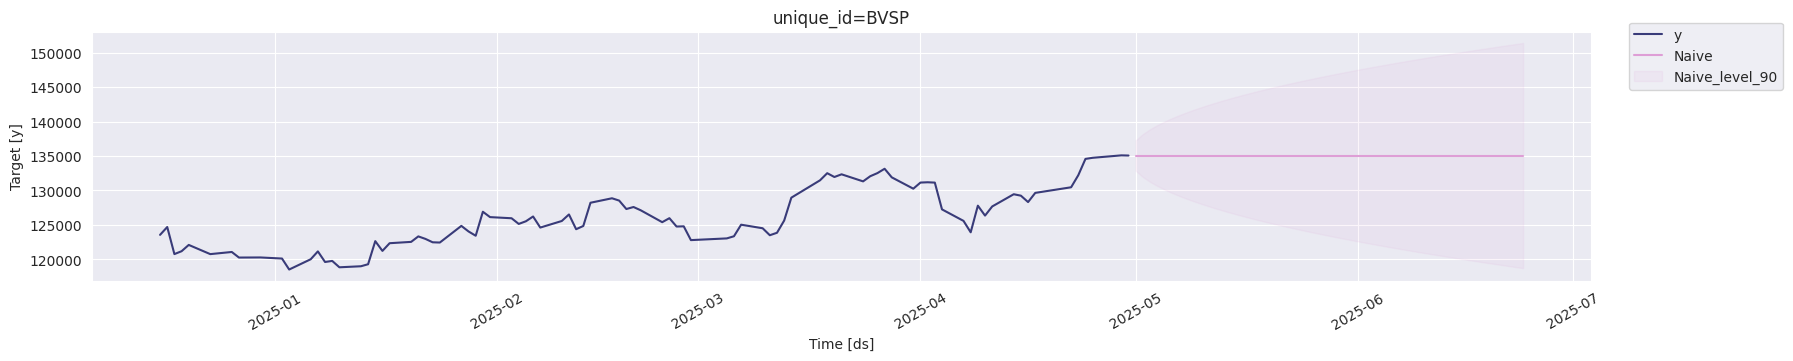

In [159]:
treino['unique_id'] = 'BVSP'
#treino['unique_id'] = 'y'
# treino = treino.drop(columns=['Daily_Direction']) # Remove the string column - This column should be dropped before splitting into treino and teste
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])

wmape1 = wmape(teste['y'].values, forecast_df['Naive'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['BVSP'], engine ='matplotlib', max_insample_length=90) # Plot using the forecast_df directly
# model.plot(treino, forecast_df, level=[90], y=['y'],engine ='matplotlib', max_insample_length=90)

WMAPE: 9.14%


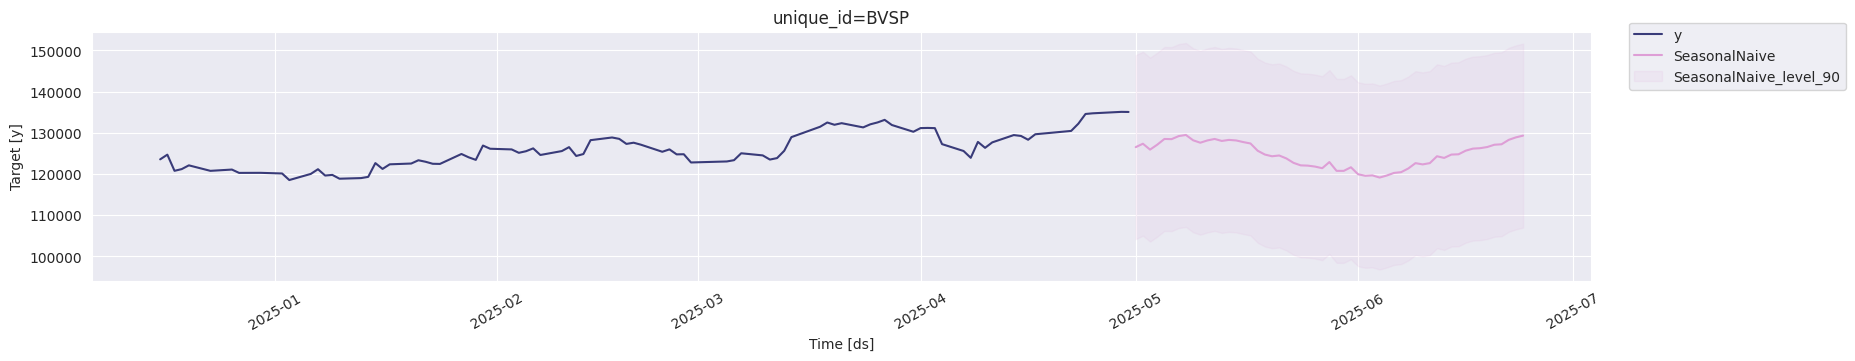

In [160]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=252)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])

wmape2 = wmape(teste['y'].values, forecast_dfs['SeasonalNaive'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Plot using the forecast_dfs directly

In [168]:
# setando ds como indice de teste
teste.set_index('ds', inplace=True)
teste.head()

,y,Abertura,MedMov5Dias,unique_id
ds,,,,
2025-05-02,135134.0,135067.0,135009.8,1
2025-05-05,133491.0,135131.0,134760.2,0
2025-05-06,133516.0,133499.0,134460.2,1
2025-05-07,133398.0,133517.0,134121.2,0
2025-05-08,136232.0,133458.0,134354.2,1


In [169]:
type(teste)

pandas.core.frame.DataFrame

In [162]:
# deslocando coluna Seasonalnaive uma linha para baixo
#forecast_dfs.set_index('ds', inplace=True)
#forecast_dfs["SeasonalNaive_shift"] = SeasonalNaive.shift(1)
forecast_dfs.head()

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90
0,BVSP,2025-05-01,126526.0,104188.699609,148863.300391
1,BVSP,2025-05-02,127352.0,105014.699609,149689.300391
2,BVSP,2025-05-03,125924.0,103586.699609,148261.300391
3,BVSP,2025-05-04,127122.0,104784.699609,149459.300391
4,BVSP,2025-05-05,128509.0,106171.699609,150846.300391


In [164]:
forecast_dfs["SeasonalNaive_shift"] = forecast_dfs["SeasonalNaive"].shift(1)
forecast_dfs.set_index('ds', inplace=True)
forecast_dfs.head()

,unique_id,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,SeasonalNaive_shift
ds,,,,,
2025-05-01,BVSP,126526.0,104188.699609,148863.300391,NaN
2025-05-02,BVSP,127352.0,105014.699609,149689.300391,126526.0
2025-05-03,BVSP,125924.0,103586.699609,148261.300391,127352.0
2025-05-04,BVSP,127122.0,104784.699609,149459.300391,125924.0
2025-05-05,BVSP,128509.0,106171.699609,150846.300391,127122.0


In [165]:

# Merge entre "SeasonalNaive_shift" e data frame teste pelo campo "ds"
teste['unique_id'] = teste['unique_id'].astype(str) # Convert 'unique_id' to object type in teste
forecast_dfs = forecast_dfs.merge(teste, on=['ds', 'unique_id'], how='left')
forecast_dfs.head()

,unique_id,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,SeasonalNaive_shift,y,Abertura,MedMov5Dias
ds,,,,,,,,
2025-05-01,BVSP,126526.0,104188.699609,148863.300391,NaN,NaN,NaN,NaN
2025-05-02,BVSP,127352.0,105014.699609,149689.300391,126526.0,NaN,NaN,NaN
2025-05-03,BVSP,125924.0,103586.699609,148261.300391,127352.0,NaN,NaN,NaN
2025-05-04,BVSP,127122.0,104784.699609,149459.300391,125924.0,NaN,NaN,NaN
2025-05-05,BVSP,128509.0,106171.699609,150846.300391,127122.0,NaN,NaN,NaN


,unique_id,ds,SeasWA,y,Abertura,MedMov5Dias
40,BVSP,2025-06-10,121375.5,NaN,NaN,NaN
41,BVSP,2025-06-11,120787.5,NaN,NaN,NaN
42,BVSP,2025-06-12,121642.5,NaN,NaN,NaN
43,BVSP,2025-06-13,121075.0,NaN,NaN,NaN
44,BVSP,2025-06-14,121120.5,NaN,NaN,NaN
45,BVSP,2025-06-15,120734.0,NaN,NaN,NaN
46,BVSP,2025-06-16,122022.5,NaN,NaN,NaN
47,BVSP,2025-06-17,122125.5,NaN,NaN,NaN
48,BVSP,2025-06-18,122970.0,NaN,NaN,NaN
49,BVSP,2025-06-19,122812.0,NaN,NaN,NaN


Index(['unique_id', 'ds', 'SeasWA', 'y', 'Abertura', 'MedMov5Dias'], dtype='object')

WMAPE: nan%


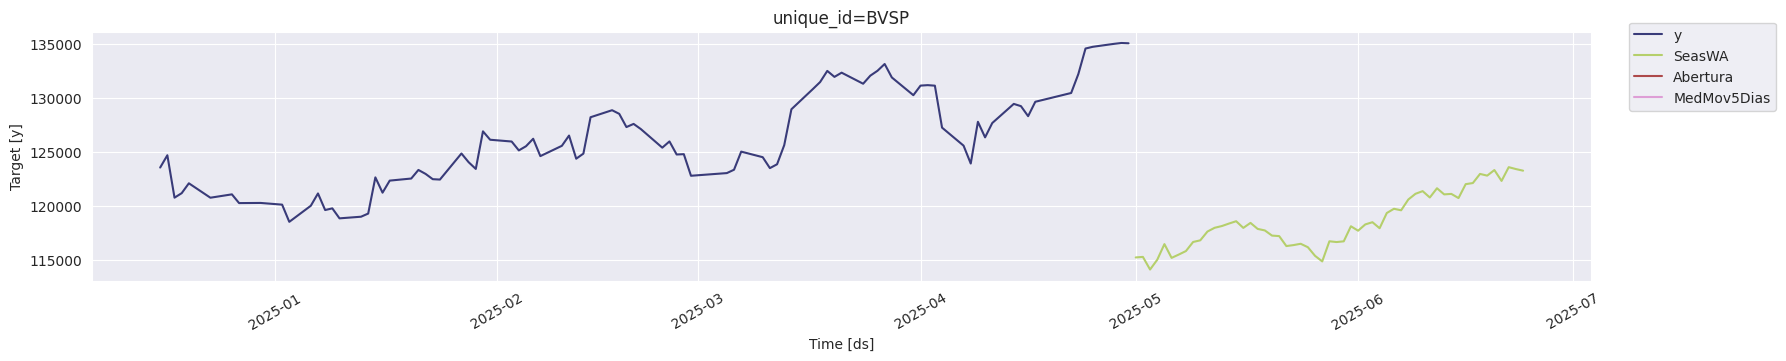

In [98]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=252, window_size=2)], freq='D', n_jobs=-1) # Removed prediction_intervals=True
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h) # Removed level=[90]
#forecast_dfsm = forecast_dfsm.reset_index().merge(teste, on=['ds', 'unique_id'], how='left')
forecast_dfsm = forecast_dfsm.merge(teste, on=['ds', 'unique_id'], how='left')

display(forecast_dfsm.tail(15))
display(forecast_dfsm.columns)

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values) # Corrected model name in WMAPE calculation
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Removed level=[90]

In [99]:
# model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=252), SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_a = StatsForecast(models=[AutoARIMA(season_length=252)], freq='D', n_jobs=-1)


treino_arima = treino.drop(columns=['MedMov5Dias']) # Remove MedMov5Dias for ARIMA
model_a.fit(treino_arima)

# forecast_dfa = model_a.predict(h=h, level=[90])
# forecast_dfa = forecast_dfa.reset_index().merge(teste, on=['ds', 'unique_id'], how='left') # Moved merge after plotting

# forecast_dfa = model_a.predict(h=h, level=[90])
# forecast_dfa = forecast_dfa.reset_index().merge(teste, on=['ds', 'unique_id'], how='left') # Moved merge after plotting
forecast_dfa = model_a.predict(h=h, level=[90], X_df=teste[['ds', 'unique_id', 'Abertura']])


wmape4 = wmape(teste['y'].values, forecast_dfa['AutoARIMA'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Plot using the forecast_dfa directly

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_confusion['y'], df_confusion['yhat_binary'])
print("Confusion Matrix:")
print(cm)

In [ ]:
# utiliza a biblioteca prophet
!pip install prophet

In [ ]:
# carrega biblioteca prophet
from prophet import Prophet
import prophet

# verifica versão da biblioteca
print('Versão do Prophet => %s' % prophet.__version__ )

In [ ]:
# copia os dados do Dataframe "dados" para usar com a biblioteca prophet.
df_dados_prophet = dados.copy().drop(labels=['Data'], axis=1)

# verificando base de dados
df_dados_prophet.info()
df_dados_prophet.head()

In [ ]:
# Apaga indice como tipo "datetima"
df_dados_prophet = df_dados_prophet.reset_index()
# df_dados_prophet = df_dados_prophet.reset_index().rename(columns={'Data':'ds', 'Ultimo':'y'})

# mostra dados
df_dados_prophet.info()
df_dados_prophet.head()

In [ ]:
# biblioteca prophet trabalh com apenas 2 colunas chamadas DS e Y.

# Apaga colunas 'High', 'Low', 'Close' e 'Volume'
df_dados_prophet.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)

df_dados_prophet.info()
df_dados_prophet.head()


In [ ]:
#renomeia colunas 'Date' e 'Open' para 'ds' e 'y'
df_dados_prophet.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)

# mostra dados
df_dados_prophet.head()

In [ ]:
# Separar os dados do dataframe em 2 grupos, um de treinamento para o modelo e outro para validação:

# Dados de treino
df_prophet_treino = df_dados_prophet.loc[df_dados_prophet['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste = df_dados_prophet.loc[df_dados_prophet['ds'] >= '2025-05-01']

In [ ]:
# Verificando dados de treino:
df_prophet_treino.info()
df_prophet_treino.head()

In [ ]:
# Verificando dados de teste:
df_prophet_teste.info()
df_prophet_teste.head()

In [ ]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m = Prophet()
df_prophet_treino['ds'] = df_prophet_treino['ds'].dt.tz_localize(None)
m.fit(df_prophet_treino)

In [ ]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future = m.make_future_dataframe(periods=252)
future.head()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# # modelo prophet com variação binaria da variavel target.
df_dados_prophet_bin = df_dados_prophet.copy()

In [ ]:
# copiando coluna de verificação
df_dados_prophet_bin['col_conf']=df_dados_prophet_bin['y']
df_dados_prophet_bin.head()

In [ ]:
# variável target como binária.
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)

In [ ]:
df_dados_prophet_bin.head(30)

In [ ]:
df_dados_prophet_bin.tail(30)

# apóss conferencia, retirar a coluna col_conf
df_dados_prophet_bin.drop(labels=['col_conf'], axis=1, inplace=True)

In [ ]:
# Visualizando noda dataframe.
df_dados_prophet_bin.info()
df_dados_prophet_bin.head()

In [ ]:
# Dados de treino
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']

In [ ]:
# Verificando dados de treino:
df_prophet_treino_bin.info()
df_prophet_treino_bin.head()

In [ ]:
df_prophet_teste_bin.info()
df_prophet_teste_bin.head()

In [ ]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)

In [ ]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future_bin = m_bin.make_future_dataframe(periods=252)
#future_bin.head()
future_bin.tail()

In [ ]:
forecast_bin = m_bin.predict(future_bin)
forecast_bin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

# Task
Calculate and display the confusion matrix for the model's predictions on the test set.

## Prepare data

### Subtask:
Create a DataFrame with actual and forecasted daily directions for the test set.


**Reasoning**:
Create a new DataFrame for confusion matrix calculation, add the actual values from the test set, and filter the forecasted binary predictions to align with the test set dates.



In [ ]:
# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.g., 0.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

**Reasoning**:
The error indicates that `df_prophet_teste` is not defined. I need to redefine `df_prophet_teste` and `df_dados_prophet_bin` as they might have been cleared from the environment. Then I can proceed with creating the confusion matrix dataframe.



In [ ]:
# Re-create df_dados_prophet_bin and df_prophet_teste_bin
df_dados_prophet_bin = dados.copy().drop(labels=['Data'], axis=1)
df_dados_prophet_bin = df_dados_prophet_bin.reset_index()
df_dados_prophet_bin.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)
df_dados_prophet_bin.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']


# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

**Reasoning**:
The error indicates that `forecast_bin` is not defined. I need to regenerate `forecast_bin` by fitting the Prophet model again and making future predictions. Then I can proceed with creating the confusion matrix dataframe.



In [ ]:
# Re-fit the Prophet model and generate forecast_bin
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)
future_bin = m_bin.make_future_dataframe(periods=252)
forecast_bin = m_bin.predict(future_bin)

# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

**Reasoning**:
The error indicates that `Prophet` is not defined. I need to re-import the `Prophet` class from the `prophet` library. Then I can proceed with re-fitting the model, generating the forecast, and creating the confusion matrix dataframe.



In [ ]:
from prophet import Prophet

# Re-fit the Prophet model and generate forecast_bin
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)
future_bin = m_bin.make_future_dataframe(periods=252)
forecast_bin = m_bin.predict(future_bin)

# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())